# Python Assignment 4

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

Training samples: 209
Test samples: 50
Iter 500/2000, loss = 0.303529
Iter 1000/2000, loss = 0.214944
Iter 1500/2000, loss = 0.166597
Iter 2000/2000, loss = 0.135659
Training complete.
Training Accuracy: 99.04%
Testing Accuracy:  70.00%
Misclassified test indices (0-based within test set): [ 5  6 10 11 13 18 19 28 29 30 33 34 41 44 46]
Number misclassified: 15


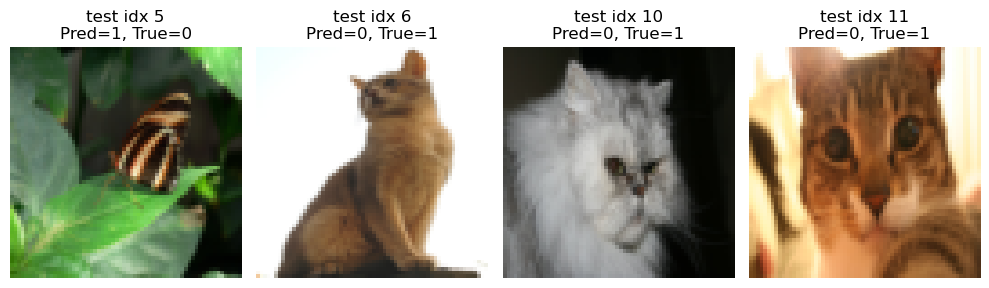

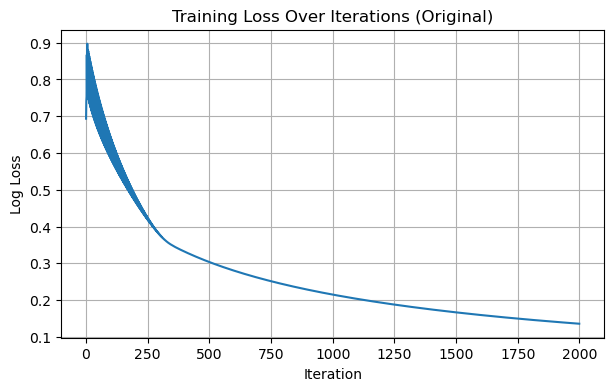

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#loading data from .h5 files
def load_cat_dataset():
    train_file = h5py.File("train_catvnoncat.h5", "r")
    test_file  = h5py.File("test_catvnoncat.h5",  "r")

    X_train = np.array(train_file["train_set_x"][:])     #shape (209, 64,64,3)
    y_train = np.array(train_file["train_set_y"][:])     #shape (209,)
    X_test  = np.array(test_file["test_set_x"][:])       #shape (50, 64,64,3)
    y_test  = np.array(test_file["test_set_y"][:])

    #reshape to (1, m)
    y_train = y_train.reshape(1, -1)
    y_test  = y_test.reshape(1, -1)

    return X_train, y_train, X_test, y_test

#load data
X_train_raw, y_train, X_test_raw, y_test = load_cat_dataset()

#flatten images to column vectors and scale to [0,1]
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1).T / 255.0  #shape (12288, m_train)
X_test  = X_test_raw.reshape(X_test_raw.shape[0], -1).T / 255.0     #shape (12288, m_test)

n_x = X_train.shape[0]
m_train = X_train.shape[1]
m_test = X_test.shape[1]

print("Training samples:", m_train)
print("Test samples:", m_test)

#parameters and hyperparameters
learning_rate = 0.005
num_iters = 2000

W = np.zeros((n_x, 1))  #column vector (12288,1)
b = 0.0

loss_history = []

#gradient descent training
for i in range(num_iters):
    #forward propagation
    Z = np.dot(W.T, X_train) + b           #shape (1, m_train)
    A = sigmoid(Z)                         #shape (1, m_train)

    #compute loss
    loss = -np.mean(y_train * np.log(A + 1e-8) + (1 - y_train) * np.log(1 - A + 1e-8))
    loss_history.append(loss)

    #backward propagation
    dZ = A - y_train                       #(1, m_train)
    dW = (X_train @ dZ.T) / m_train        #(12288, 1)
    db = np.mean(dZ)                       #scalar

    #parameter update
    W -= learning_rate * dW
    b -= learning_rate * db

    #print progress
    if (i+1) % 500 == 0:
        print(f"Iter {i+1}/{num_iters}, loss = {loss:.6f}")

print("Training complete.")

#predictions and accuracy
def predict(W, b, X):
    probs = sigmoid(np.dot(W.T, X) + b)
    return (probs >= 0.5).astype(int)   #shape (1, m)

train_pred = predict(W, b, X_train)    #(1, m_train)
test_pred  = predict(W, b, X_test)     #(1, m_test)

train_acc = np.mean(train_pred == y_train) * 100
test_acc  = np.mean(test_pred == y_test) * 100

print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Testing Accuracy:  {test_acc:.2f}%")

#misclassified indicies
mis_idx = np.where(test_pred.reshape(-1) != y_test.reshape(-1))[0]
print("Misclassified test indices (0-based within test set):", mis_idx)
print("Number misclassified:", len(mis_idx))

#display 4 misclassified images
num_to_show = min(4, len(mis_idx))
if num_to_show > 0:
    plt.figure(figsize=(10,6))
    for i in range(num_to_show):
        idx = mis_idx[i]
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(X_test_raw[idx])
        plt.title(f"test idx {idx}\nPred={int(test_pred[0,idx])}, True={int(y_test[0,idx])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images to show.")

#plot the loss curve
plt.figure(figsize=(7,4))
plt.plot(loss_history)
plt.title("Training Loss Over Iterations (Original)")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()
